## **The MNIST Dataset**

70,000 images of handwritten digits. (60,000 training, 10,000 testing)

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
import tensorflow
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model
from keras import backend as K
from keras.layers import Dense

In [7]:
#import dataset
from keras.datasets import mnist

#load dataset
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
#count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

#count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


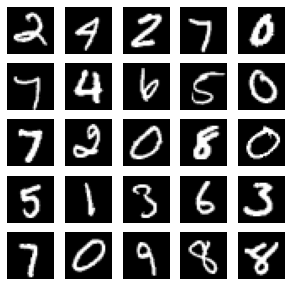

In [11]:
#sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

#plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()

In [12]:
#compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [13]:
#convert to one hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
#image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [16]:
#resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) #add -1 to match new reshape with original train data
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1,input_size])
x_test = x_test.astype('float32')/255

In [17]:
x_train.shape

(60000, 784)

## **Building Neural Network**

In [18]:
#network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [19]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(num_labels, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [22]:
pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install graphviz


  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [52]:
plot_model(model, to_file='mlp-mnist.png',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
H = model.fit(x_train,y_train,epochs=20, batch_size=batch_size, validation_split=0.3)

Epoch 1/20
329/329 [==============================] - 2s 5ms/step - loss: 0.3048 - accuracy: 0.9140 - val_loss: 0.1554 - val_accuracy: 0.9548
Epoch 2/20
329/329 [==============================] - 2s 5ms/step - loss: 0.1145 - accuracy: 0.9660 - val_loss: 0.1254 - val_accuracy: 0.9622
Epoch 3/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0758 - accuracy: 0.9765 - val_loss: 0.1052 - val_accuracy: 0.9676
Epoch 4/20
329/329 [==============================] - 1s 4ms/step - loss: 0.0510 - accuracy: 0.9846 - val_loss: 0.0985 - val_accuracy: 0.9713
Epoch 5/20
329/329 [==============================] - 1s 4ms/step - loss: 0.0369 - accuracy: 0.9889 - val_loss: 0.0922 - val_accuracy: 0.9740
Epoch 6/20
329/329 [==============================] - 1s 4ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0958 - val_accuracy: 0.9729
Epoch 7/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0205 - accuracy: 0.9938 - val_loss: 0.0958 - val_accuracy: 0.9747
Epoch 

In [30]:
loss,acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9819

Test accuracy: 98.2%


In [31]:
loss,acc = model.evaluate(x_train, y_train)
print('\nTest accuracy: %.1f%%' % (100.0 * acc))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0382 - accuracy: 0.9934

Test accuracy: 99.3%


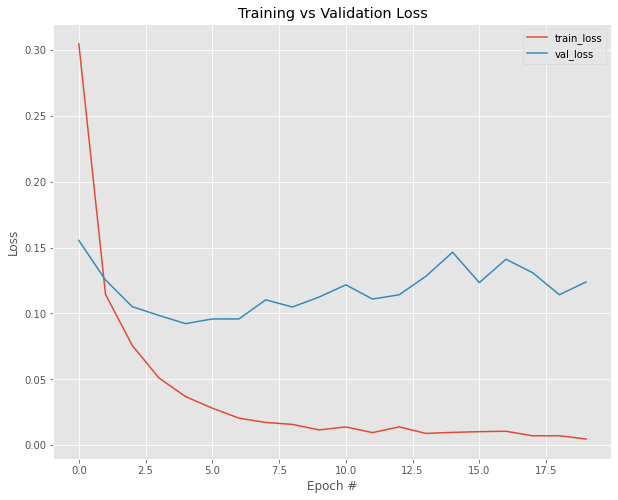

In [32]:
import matplotlib.pyplot as plt

epochs = np.arange(0, len(H.history['loss']))
plt.figure(figsize=(10,8))
plt.style.use('ggplot')

#plot training and valiation loss
plt.style.use('ggplot')
plt.plot(epochs, H.history['loss'], label='train_loss')
plt.plot(epochs, H.history['val_loss'], label='val_loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

## **Adding L2 Regularuization**

In [36]:
from keras.layers import Dense, Activation, Dropout
import keras

model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.3)

Epoch 1/20
329/329 [==============================] - 2s 6ms/step - loss: 0.4977 - accuracy: 0.9101 - val_loss: 0.3069 - val_accuracy: 0.9475
Epoch 2/20
329/329 [==============================] - 2s 5ms/step - loss: 0.2361 - accuracy: 0.9617 - val_loss: 0.2212 - val_accuracy: 0.9597
Epoch 3/20
329/329 [==============================] - 2s 5ms/step - loss: 0.1755 - accuracy: 0.9718 - val_loss: 0.2047 - val_accuracy: 0.9598
Epoch 4/20
329/329 [==============================] - 2s 5ms/step - loss: 0.1492 - accuracy: 0.9758 - val_loss: 0.2019 - val_accuracy: 0.9591
Epoch 5/20
329/329 [==============================] - 2s 5ms/step - loss: 0.1300 - accuracy: 0.9788 - val_loss: 0.1537 - val_accuracy: 0.9719
Epoch 6/20
329/329 [==============================] - 2s 6ms/step - loss: 0.1193 - accuracy: 0.9819 - val_loss: 0.1609 - val_accuracy: 0.9683
Epoch 7/20
329/329 [==============================] - 2s 6ms/step - loss: 0.1150 - accuracy: 0.9817 - val_loss: 0.1632 - val_accuracy: 0.9682
Epoch 

In [38]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTest accuracy: %.1f%%' % (100.0 * acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.1400 - accuracy: 0.9729

Test accuracy: 97.3%


In [39]:
loss, acc = model.evaluate(x_train, y_train)
print('\nTest accuracy: %.1f%%' % (100.0 *acc))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0979 - accuracy: 0.9845

Test accuracy: 98.5%


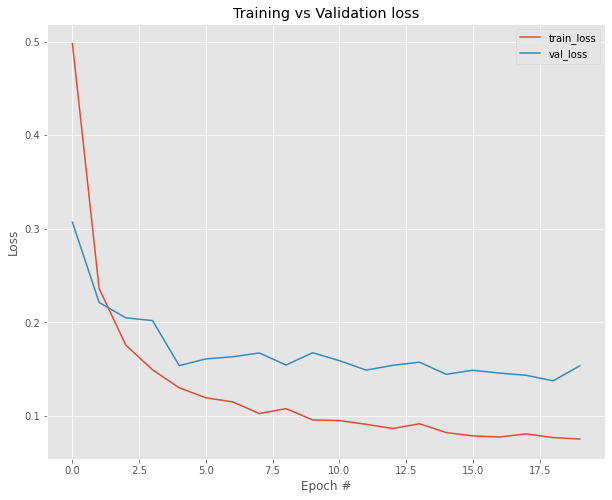

In [41]:
import matplotlib.pyplot as plt

epochs = np.arange(0, len(H.history['loss']))
plt.figure(figsize=(10,8))
plt.style.use('ggplot')

#plot training and validation loss
plt.style.use('ggplot')
plt.plot(epochs, H.history['loss'], label='train_loss')
plt.plot(epochs, H.history['val_loss'], label='val_loss')
plt.title('Training vs Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

## **Adding Dropout**

In [44]:
from keras.layers import Dense, Activation, Dropout

#model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.3)

Epoch 1/20
329/329 [==============================] - 3s 7ms/step - loss: 0.5076 - accuracy: 0.8430 - val_loss: 0.1855 - val_accuracy: 0.9438
Epoch 2/20
329/329 [==============================] - 2s 6ms/step - loss: 0.2257 - accuracy: 0.9326 - val_loss: 0.1359 - val_accuracy: 0.9603
Epoch 3/20
329/329 [==============================] - 2s 6ms/step - loss: 0.1746 - accuracy: 0.9478 - val_loss: 0.1218 - val_accuracy: 0.9639
Epoch 4/20
329/329 [==============================] - 2s 6ms/step - loss: 0.1453 - accuracy: 0.9558 - val_loss: 0.1088 - val_accuracy: 0.9681
Epoch 5/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1242 - accuracy: 0.9623 - val_loss: 0.1008 - val_accuracy: 0.9694
Epoch 6/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1107 - accuracy: 0.9655 - val_loss: 0.0937 - val_accuracy: 0.9721
Epoch 7/20
329/329 [==============================] - 2s 7ms/step - loss: 0.1031 - accuracy: 0.9680 - val_loss: 0.0987 - val_accuracy: 0.9720
Epoch 

In [46]:
loss, acc = model.evaluate(x_test,y_test)
print('\nTest accuracy: %.1f%%' % (100.0 * acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9789

Test accuracy: 97.9%


In [47]:
loss, acc = model.evaluate(x_train,y_train)
print('\nTest accuracy: %1.f%%' % (100.0*acc))

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0344 - accuracy: 0.9912

Test accuracy: 99%


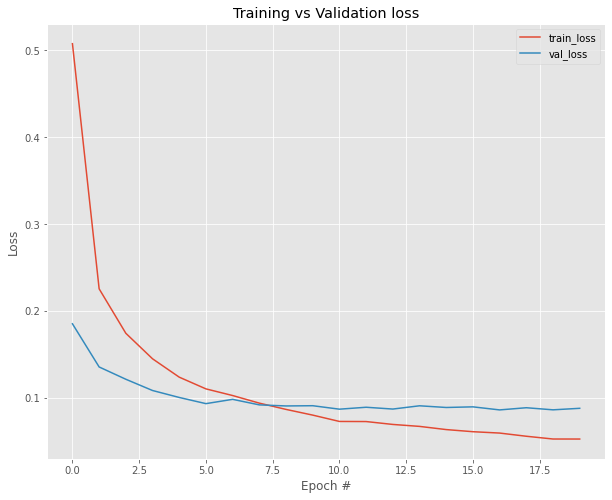

In [50]:
import matplotlib.pyplot as plt

epochs = np.arange(0, len(H.history['loss']))
plt.figure(figsize=(10,8))
plt.style.use('ggplot')

#plot training and validation loss
plt.style.use('ggplot')
plt.plot(epochs, H.history['loss'], label='train_loss')
plt.plot(epochs, H.history['val_loss'], label='val_loss')
plt.title('Training vs Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()